In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

In [2]:
from match_template import cv_aoi

In [3]:
aoi_model = cv_aoi()

In [11]:
golden_imgs = []
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-143842.bmp'))
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-143945.bmp'))
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-143910.bmp'))
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-155452.bmp'))
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-155433.bmp'))
golden_imgs.append(cv2.imread('C:/Users/yuan/Desktop/factory/20250529elgato反/snapshot_20250529-155408.bmp'))

goldens = []
for img in golden_imgs:
    kp, des = aoi_model.get_keypoint(img)
    goldens.append([img, kp, des])
len(goldens)

6

In [12]:
aoi = [150,2000,800,2800]

#test_img = cv2.imread('C:/Users/peilien/Downloads/snapshot_20250529-144009.bmp')[aoi[0]:aoi[1], aoi[2]:aoi[3]]
#test_img = cv2.imread('C:/Users/peilien/Downloads/snapshot_20250529-144009.bmp')[aoi[0]:aoi[1], aoi[2]:aoi[3]]
test_img = cv2.imread('C:/Users/yuan/Desktop/factory/snapshot_20250529-161051.bmp')[aoi[0]:aoi[1], aoi[2]:aoi[3]]

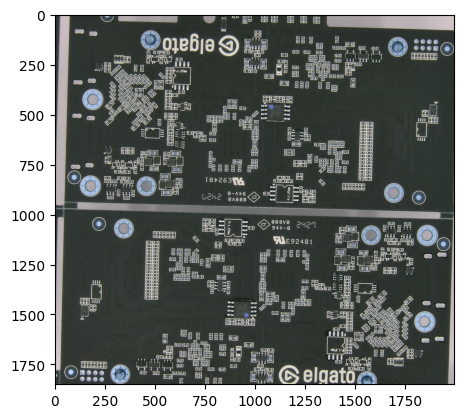

(2160, 3840, 3)


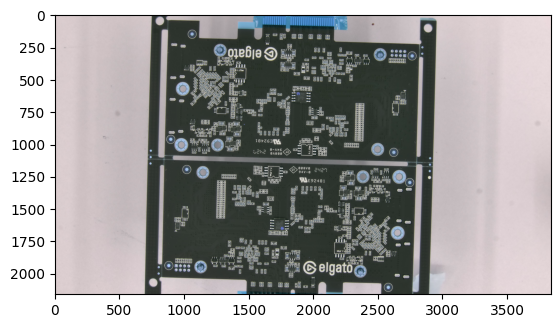

In [13]:
if 1:
    plt.imshow(test_img)
    plt.show()
    print(golden_imgs[0].shape)
    plt.imshow(golden_imgs[0])
    plt.show()

In [14]:
%time mask, mask_mean, mask_min, a = aoi_model.match_template(test_img, goldens, aoi)

CPU times: total: 7.27 s
Wall time: 1.57 s


CPU times: total: 15.6 ms
Wall time: 17.2 ms


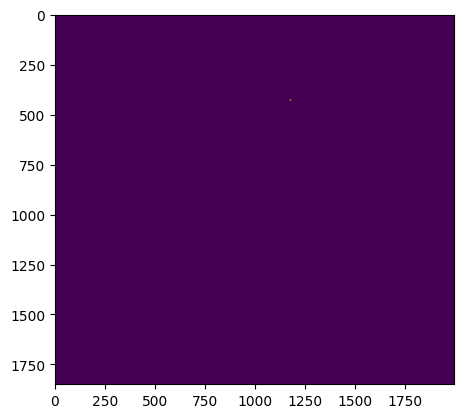

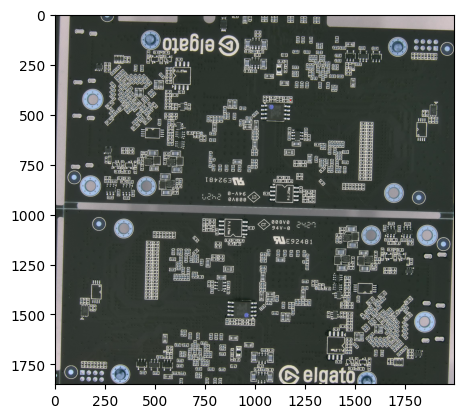

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

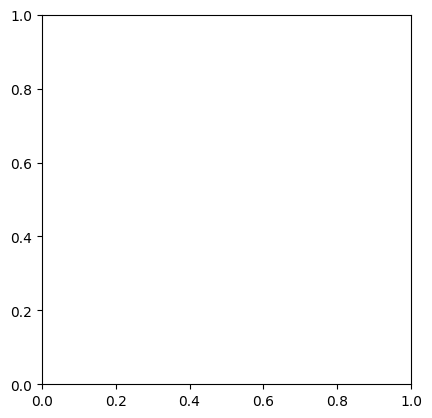

In [16]:
m = aoi_model.post_proc(mask_min, 75, 2,2)

res = (np.stack([np.maximum(m,a[:,:,0]), a[:,:,1]*(m==0), a[:,:,2]*(m==0)], axis=-1))

%time circle_image = aoi_model.draw_circle(m, res, min_samples=25)
plt.imshow(m)
plt.show()
plt.imshow(res)
plt.show()
plt.imshow(circle_image)